In [2]:
pip install tabgan==1.3.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install lightgbm

In [4]:
pip install --upgrade pandas "dask[complete]"

Note: you may need to restart the kernel to use updated packages.


In [5]:
## librerias requeridas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import re
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
#from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
#from scikitplot.metrics import plot_lift_curve
#from scikitplot.helpers import binary_ks_curve 
#from scikitplot.metrics import plot_ks_statistic
#from scikitplot.helpers import cumulative_gain_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from datetime import datetime, timedelta

import pyarrow as pa
import pyarrow.parquet as pq

In [6]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.memory_usage', True)

## Cargo el modelo y los datos a los que lo voy a aplicar 

In [7]:
import os
os.getcwd()

'/home/ec2-user/SageMaker/viamericas-dev/Analytics/5.Fraud'

In [8]:
import os
import joblib
# load model
#modelo = joblib.load("Analytics/5.Fraud/ModeloV1Todos.pkl") 
modelo = joblib.load("ModeloFinal2.pkl") 
variables = open('./ModeloFinal2.txt','r')
##ModeloV1T1

In [9]:
modelo

LGBMClassifier(colsample_bytree=0.84, importance_type='gini',
               learning_rate=0.07, max_depth=20, min_child_weight=0.0026,
               n_estimators=520, num_leaves=30, objective='binary',
               scale_pos_weight=0.003, subsample=1)

# Veo si puedo sacar los nombres directo del modelo q cargue


In [10]:
variables = open('./ModeloFinal.txt','r')
var_input = variables.read()

In [11]:
var_input = ['01_branch_working_days', 'branch_minutes_since_last_transaction', 
    'branch_trans_3m', 'branch_has_fraud', 
    'branch_trans_40min', 'branch_trans_10min', 'cash_pick_up_40min', 
    'location_nro_fraud', 'sender_trans_3m', 
    'sender_nro_fraud', '01_isMexico', 
    '01_sender_branch_state', '01_var_range_hist', 
    '01_branch_fraud', '01_location_fraud', '01_sender_fraud', 
    '01_isCashPick', '01_isBankDep', 
    'sender_days_to_last_transaction_more7m', 
    '01_receiver_transaction_count', '01_sender_sending_days', 
    '01_branch_working_days', '01_net_amount_receiver', 
    '01_sender_minutes_since_last_transaction_2days',
    '01_sender_days_to_last_transaction_365', 
    '01_sender_days_to_last_transaction_7m', '01_hour_receiver']

In [12]:
s3_url = f"viamericas-datalake-dev-us-east-1-283731589572-raw/FraudModel/Data4Model/TargetTodos"
dfTrain = pd.read_parquet(f"s3://{s3_url}/Train/Train.parquet")
tgTrain = dfTrain['target']

dfVal = pd.read_parquet(f"s3://{s3_url}/Validation/Validation.parquet")
tgVal = dfVal['target']

#Uni test y Val
#X = pd.concat([dfTrain[var_input], dfVal[var_input]], ignore_index=True) 
X = pd.concat([dfTrain, dfVal], ignore_index=True) 
Y = pd.DataFrame(pd.concat([dfTrain['target'], dfVal['target']], ignore_index=True)) 

dias_target = ['day_name_receiver_0', 'day_name_receiver_1',
       'day_name_receiver_2', 'day_name_receiver_3',
       'day_name_receiver_4', 'day_name_receiver_5',
       'day_name_receiver_6','target']

testeo =  pd.concat([X, Y], axis=1)
Y_target = pd.DataFrame(pd.concat([dfTrain[dias_target], dfVal[dias_target]], ignore_index=True)) 

In [13]:
testeo[var_input]

,01_branch_working_days,branch_minutes_since_last_transaction,branch_trans_3m,branch_has_fraud,branch_trans_40min,branch_trans_10min,cash_pick_up_40min,location_nro_fraud,sender_trans_3m,sender_nro_fraud,01_isMexico,01_sender_branch_state,01_var_range_hist,01_branch_fraud,01_location_fraud,01_sender_fraud,01_isCashPick,01_isBankDep,sender_days_to_last_transaction_more7m,01_receiver_transaction_count,01_sender_sending_days,01_branch_working_days,01_net_amount_receiver,01_sender_minutes_since_last_transaction_2days,01_sender_days_to_last_transaction_365,01_sender_days_to_last_transaction_7m,01_hour_receiver
0,0.052826,131.0,2659.0,0,1,1,1,0,2.0,0,True,True,1.000000,False,False,False,True,False,0,0.029703,0.635714,0.052826,0.216606,0.000000,0.172603,0.300000,0.583333
1,0.119738,109.0,1115.0,0,1,1,1,0,17.0,0,False,True,0.731183,False,False,False,True,False,0,0.108911,0.183929,0.119738,0.021661,0.000000,0.016438,0.028571,0.666667
2,0.337246,933.0,877.0,0,1,1,1,0,5.0,0,False,True,0.390625,False,False,False,True,False,0,0.009901,0.123214,0.337246,0.009025,0.000000,0.030137,0.052381,0.541667
3,0.287942,5.0,4494.0,0,2,2,2,0,12.0,0,False,True,2.432432,False,False,False,True,False,0,0.435644,0.733929,0.287942,0.162455,0.000000,0.021918,0.038095,0.375000
4,0.234781,56.0,751.0,0,1,1,1,0,2.0,0,True,True,1.000000,False,False,False,True,False,0,0.029703,0.837500,0.234781,0.722022,0.000000,0.161644,0.280952,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724863,0.039074,3.0,942.0,0,5,2,5,0,1.0,0,True,False,1.000000,False,False,False,True,False,0,0.019802,NaN,0.039074,0.036101,0.000000,NaN,NaN,0.541667
16724864,0.239980,60.0,2028.0,0,1,1,1,0,8.0,0,False,True,1.015873,False,False,False,True,False,0,0.504950,0.987500,0.239980,0.144404,0.000000,0.019178,0.033333,0.500000
16724865,0.500252,0.0,10118.0,0,9,3,8,0,8.0,0,False,True,1.484117,False,False,False,True,False,0,0.138614,0.212500,0.500252,0.105415,0.000000,0.019178,0.033333,0.750000
16724866,0.132316,126.0,3154.0,0,1,1,1,0,3.0,0,True,True,1.014085,False,False,False,True,False,0,0.128713,0.617857,0.132316,0.043321,0.000000,0.035616,0.061905,0.541667


In [14]:
# Prediciendo la variable objetivo para el conjunto de datos de prueba 'X_TESTEO' utilizando el clasificador LightGBM
testeo_data_pred_rf = modelo.predict(testeo[var_input])

# Prediciendo las probabilidades de clase para cada observación en 'X_TESTEO' utilizando el clasificador LightGBM
probab_rf = modelo.predict_proba(testeo[var_input])

# Eliminando la primera columna (se asume que son las probabilidades de la clase negativa) de las probabilidades predichas
# Se asume que la segunda columna contiene las probabilidades para la clase positiva
score_rf = np.delete(probab_rf, np.s_[0], axis=1)

# Creando una copia del DataFrame 'Y_c' para preservar los datos originales
Y_c = Y_target.copy()

# Agregando una nueva columna 'preds_rf' al DataFrame copiado con las predicciones del clasificador LightGBM
Y_c['preds_rf'] = testeo_data_pred_rf

# Agregando una nueva columna 'score_rf' al DataFrame copiado con las probabilidades de la clase positiva
Y_c['score_rf'] = score_rf

#Calculo el primer percentil para sacar el punto de corte
percentiles = pd.qcut(Y_c['score_rf'], q=1000, duplicates='drop')
percentile_label = {p: l for l, p in enumerate(sorted(percentiles.unique(), reverse=True), start=1)}
percentiles = percentiles.map(percentile_label)
Y_c['FRAUD_DECILE'] = np.nan
Y_c['FRAUD_DECILE'] = percentiles
Y_c['FRAUD_DECILE'] = Y_c['FRAUD_DECILE'].astype('Int32')


In [15]:
#saco el punto de corte del primer centil para aplicarlo al test
corte = Y_c.score_rf[Y_c['FRAUD_DECILE']==2].min()

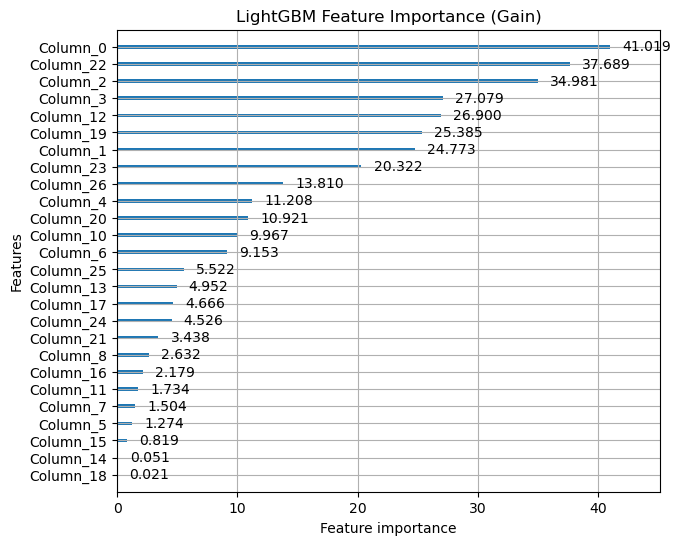

In [16]:
import lightgbm as lgb
lgb.plot_importance(modelo, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

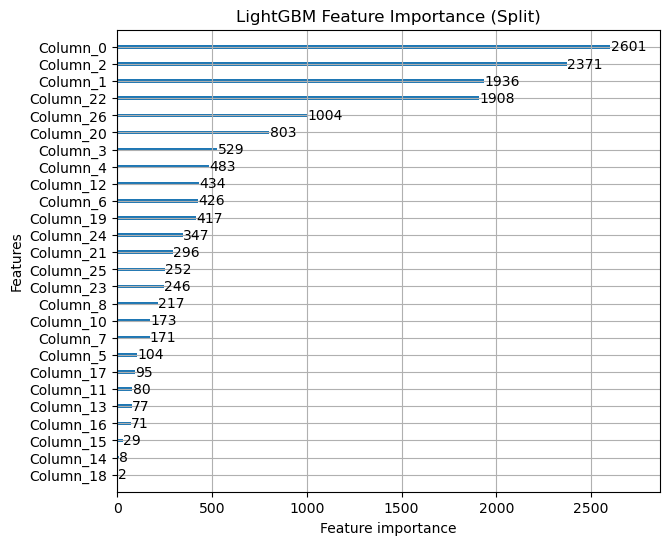

In [17]:
# Plot feature importance using Split
lgb.plot_importance(modelo, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()

In [18]:
# Save feature importance in text file
# Importance is measured in terms of gain according to LightGBM classifier
#np.savetxt('./ModeloFinalImp.txt', modelo.booster_.feature_importance(importance_type='split'),fmt='%f')
#np.savetxt('./ModeloFinalImpG.txt', modelo.booster_.feature_importance(importance_type='gain'),fmt='%f')

In [20]:
s3_url = f"viamericas-datalake-dev-us-east-1-283731589572-raw/FraudModel/Data4Model/TargetTodos"
tes = pd.read_parquet(f"s3://{s3_url}/Test/Test.parquet")

##lista de variables de input
X = tes[var_input]
Y = tes[['target']]

#testeo = pd.concat([testeo, tes], axis = 0, ignore_index=True)
#Y_target = pd.DataFrame(pd.concat([dfTrain[dias_target], dfVal[dias_target], tes[dias_target]], ignore_index=True)) 
testeo =  tes.copy()
Y_target = pd.DataFrame(tes[dias_target]) 

In [21]:
def limpiar_nombres_columnas(dataframe):
    """
    Limpia y estandariza los nombres de las columnas en un DataFrame.

    Parameters:
    - dataframe: DataFrame de pandas.

    Returns:
    - DataFrame con nombres de columnas limpios.
    """
    dataframe = dataframe.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
    return dataframe

testeo = limpiar_nombres_columnas(testeo)

In [22]:
testeo['target'].value_counts(dropna=False)

target
False    9753926
True         117
Name: count, dtype: int64

In [23]:
# Prediciendo la variable objetivo para el conjunto de datos de prueba 'X_TESTEO' utilizando el clasificador LightGBM
testeo_data_pred_rf = modelo.predict(testeo[var_input])

# Prediciendo las probabilidades de clase para cada observación en 'X_TESTEO' utilizando el clasificador LightGBM
probab_rf = modelo.predict_proba(testeo[var_input])

# Eliminando la primera columna (se asume que son las probabilidades de la clase negativa) de las probabilidades predichas
# Se asume que la segunda columna contiene las probabilidades para la clase positiva
score_rf = np.delete(probab_rf, np.s_[0], axis=1)


In [24]:
# Creando una copia del DataFrame 'Y_TESTEO' para preservar los datos originales
Y_c = Y_target.copy()

# Agregando una nueva columna 'preds_rf' al DataFrame copiado con las predicciones del clasificador LightGBM
Y_c['preds_rf'] = testeo_data_pred_rf

# Agregando una nueva columna 'score_rf' al DataFrame copiado con las probabilidades de la clase positiva
Y_c['score_rf'] = score_rf

In [25]:
pd.DataFrame(confusion_matrix(Y_c['target'], Y_c['preds_rf']))

,0,1
0,9753908,18
1,114,3


In [26]:
corte

3.4554035495967586e-07

In [27]:
Y_c['pred_corte'] = Y_c['score_rf']>corte
pd.DataFrame(confusion_matrix(Y_c['target'], Y_c['pred_corte']))

,0,1
0,9734124,19802
1,37,80


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='score_rf', ylabel='Count'>

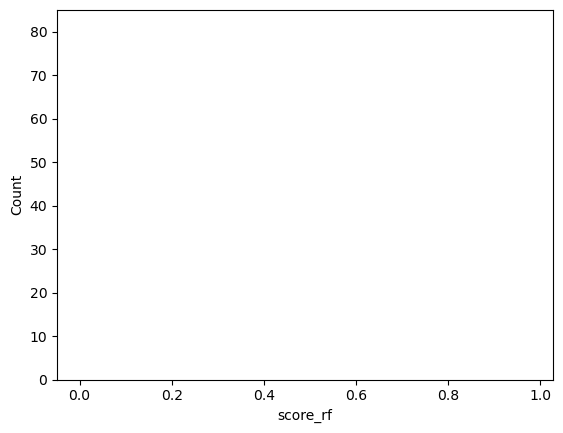

In [28]:
import seaborn as sns
sns.histplot(data = Y_c[Y_c['target'] == True], x='score_rf')

In [29]:
# Dividir las predicciones en deciles y calcular la captura del 30% en el conjunto de entrenamiento
percentiles = pd.qcut(Y_c['score_rf'], q=1000, duplicates='drop')
percentile_label = {p: l for l, p in enumerate(sorted(percentiles.unique(), reverse=True), start=1)}
percentiles = percentiles.map(percentile_label)
Y_c['FRAUD_DECILE'] = np.nan
Y_c['FRAUD_DECILE'] = percentiles
Y_c['FRAUD_DECILE'] = Y_c['FRAUD_DECILE'].astype('Int32')
print('FRAUD CAPTURA 30%:')
print(sum(Y_c[Y_c['FRAUD_DECILE'] < 4]['target']) / sum(Y_c['target']))
#Y_TESTEO_c.to_csv(r'./SCORES/primera_prueba.csv')

FRAUD CAPTURA 30%:
0.7094017094017094


In [30]:
DECILES = pd.crosstab(Y_c['FRAUD_DECILE'], Y_c['target'])
DECILES

target,False,True
FRAUD_DECILE,,
1,9690,65
2,9740,14
3,9750,4
4,9752,2
5,9749,5
...,...,...
996,9754,0
997,9754,0
998,9754,0


In [31]:
Y_c[['score_rf','FRAUD_DECILE']].groupby(['FRAUD_DECILE']).agg({'score_rf': [ 'min', 'max']}) 

score_rf              
                       min           max
FRAUD_DECILE                            
1             1.214793e-06  9.999998e-01
2             3.572427e-07  1.214574e-06
3             1.751680e-07  3.572028e-07
4             1.045288e-07  1.751521e-07
5             7.009026e-08  1.045264e-07
...                    ...           ...
996           1.386106e-13  1.589533e-13
997           1.166642e-13  1.386066e-13
998           9.251203e-14  1.166621e-13
999           6.316664e-14  9.251197e-14
1000          2.701437e-15  6.316578e-14

[1000 rows x 2 columns]

In [32]:
deciles_semana = Y_c[['day_name_receiver_0', 'day_name_receiver_1',
                   'day_name_receiver_2', 'day_name_receiver_3',
                   'day_name_receiver_4', 'day_name_receiver_5',
                   'day_name_receiver_6',
                 'FRAUD_DECILE']].groupby(['FRAUD_DECILE']).sum()

deciles_semana.head(10)

,day_name_receiver_0,day_name_receiver_1,day_name_receiver_2,day_name_receiver_3,day_name_receiver_4,day_name_receiver_5,day_name_receiver_6
FRAUD_DECILE,,,,,,,
1,1359,1352,1329,1250,1500,1592,1373
2,1352,1267,1259,1198,1582,1709,1387
3,1230,1263,1248,1156,1644,1757,1456
4,1296,1214,1199,1114,1633,1716,1582
5,1230,1288,1132,1164,1629,1750,1561
6,1324,1218,1120,1083,1672,1801,1536
7,1278,1223,1133,1137,1576,1806,1601
8,1312,1240,1137,1069,1589,1813,1594
9,1242,1173,1106,1153,1649,1823,1608


In [33]:
#DECILES.to_csv ('./deciles.csv')

## Curva ROC y FP

In [34]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [35]:
%pip install scipy==1.11.4

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_lift_curve
from scikitplot.helpers import binary_ks_curve
from scikitplot.metrics import plot_ks_statistic
from scikitplot.helpers import cumulative_gain_curve

In [37]:
# Calcular la curva de ganancia acumulativa y el LIFT del modelo en el conjunto de entrenamiento
classes = np.unique(Y_c[['target']])
percentages, gains = cumulative_gain_curve(Y_c[['target']], Y_c['score_rf'], classes[1])
percentages = percentages[1:]
gains = gains[1:]
gains = gains / percentages
indice = round(len(gains) * 0.1)
print('LIFT FRAUD TESTEO:')
print(gains[indice])

# Calcular el área bajo la curva ROC del modelo en el conjunto de entrenamiento
print('ROC FRAUD TESTEO:')
print(roc_auc_score(Y_c[['target']], Y_c['preds_rf']))

# Calcular la estadística KS del modelo en el conjunto de entrenamiento
thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(Y_c[['target']], Y_c['score_rf'])
print('KS FRAUD TESTEO:')
print(ks_statistic)

# Calcular la precisión y el recall del modelo en el conjunto de entrenamiento
precision = precision_score(Y_c[['target']], Y_c['preds_rf'])
recall = recall_score(Y_c[['target']], Y_c['preds_rf'])
print('Precision FRAUD TESTEO:')
print(precision)
print('Recall FRAUD TESTEO:')
print(recall)

LIFT FRAUD TESTEO:
9.829052775228979
ROC FRAUD TESTEO:
0.5128195901151325


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KS FRAUD TESTEO:
0.9021799472791207
Precision FRAUD TESTEO:
0.14285714285714285
Recall FRAUD TESTEO:
0.02564102564102564


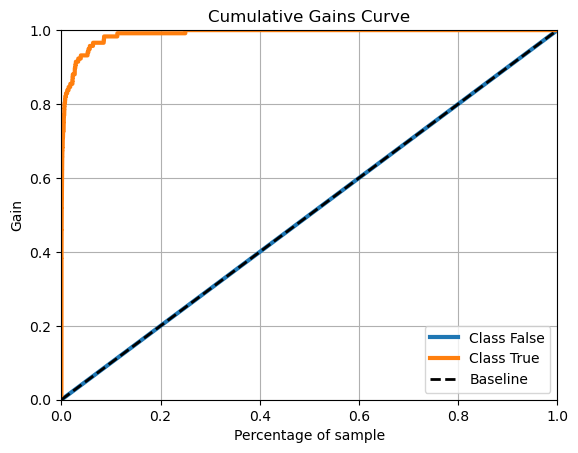

In [38]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_true=Y_c[['target']], y_probas =  probab_rf)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


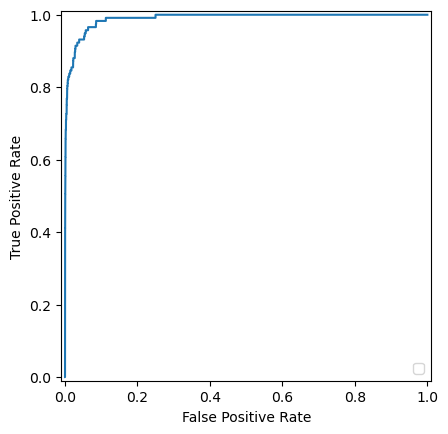

In [39]:
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, _ = roc_curve(Y_c[['target']], score_rf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

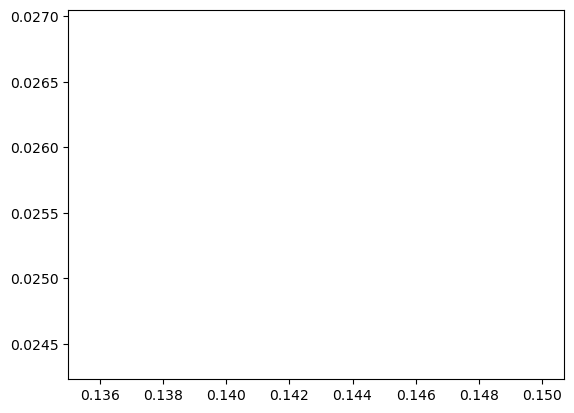

In [40]:
#precision, recall, thresholds = skplt.metrics.precision_recall_curve(Y_c[['target']], score_rf)
plt.plot(precision, recall)

## One given week

In [41]:
tes[tes['target']==True].head()

,id_branch,id_receiver,date_receiver,id_location,id_payer,id_sender_global,net_amount_receiver,receiver_transaction_count,id_country_receiver_claim,id_state_receiver_claim,id_state,branch_working_days,sender_sending_days,sender_days_to_last_transaction,id_country,fraud_classification,sender_minutes_since_last_transaction,branch_minutes_since_last_transaction,sender_days_since_last_transaction,branch_trans_3m,sender_state,branch_has_fraud,receiver_has_fraud,branch_trans_40min,branch_trans_10min,cash_pick_up_40min,location_nro_fraud,sender_trans_3m,range_hist,sender_nro_fraud,mes,hour_receiver,01_isMexico,01_sender_branch_state,01_var_range_hist,01_receiver_fraud,01_branch_fraud,01_location_fraud,01_sender_fraud,01_isCashPick,01_isBankDep,sender_days_to_last_transaction_365,sender_days_to_last_transaction_more365,sender_days_to_last_transaction_7m,sender_days_to_last_transaction_more7m,sender_minutes_since_last_transaction_2days,sender_minutes_since_last_transaction_1day,01_receiver_transaction_count,01_sender_sending_days,01_branch_working_days,01_net_amount_receiver,01_sender_minutes_since_last_transaction_2days,01_sender_minutes_since_last_transaction_1day,01_sender_days_to_last_transaction_365,01_sender_days_to_last_transaction_7m,01_hour_receiver,day_name_receiver_0,day_name_receiver_1,day_name_receiver_2,day_name_receiver_3,day_name_receiver_4,day_name_receiver_5,day_name_receiver_6,id_payout_A,id_payout_C,id_payout_D,id_payout_G,id_payout_M,id_payout_N,id_payout_O,id_payout_P,id_payout_S,id_payout_T,id_payout_X,targetR,targetP,target
60275,A21050,864,2023-09-14 14:46:04.743,CO0474,T239,10683790,2325.0,1,MEX,MEX26,CO,855,NaN,NaN,USA,Real,0.0,11.0,0.0,75.0,NJ,1,1,2,1,0,0,1.0,2325.0,0,9,14,True,False,1.000000,True,True,False,False,False,True,NaN,0,NaN,0,0.0,0.0,0.0,NaN,0.159483,0.839350,0.000000,0.000000,NaN,NaN,0.583333,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True
62508,A11337,22050,2023-09-12 16:51:44.210,GA0752,T232,7846886,950.0,1,MEX,MEX12,GA,3288,579.0,2.0,USA,Real,2860.0,5.0,2.0,1287.0,GA,2,0,3,2,0,2,4.0,395.0,0,9,16,True,True,2.405063,False,True,True,False,False,True,2.0,0,2.0,0,2860.0,0.0,0.0,1.000000,0.567500,0.342960,0.993056,0.000000,0.005479,0.009524,0.666667,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True
192258,A23929,1901,2023-09-23 20:32:02.573,NC1584,T239,10729913,1500.0,1,MEX,MEX23,NC,222,0.0,0.0,USA,Real,188.0,7.0,0.0,757.0,NC,2,0,3,2,0,0,2.0,1750.0,0,9,20,True,True,0.857143,False,True,False,False,False,True,0.0,0,0.0,0,188.0,188.0,0.0,0.000000,0.053329,0.541516,0.065278,0.130556,0.000000,0.000000,0.833333,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True
215896,A21933,8711,2023-09-12 18:43:59.803,MO0094,T057,10677538,790.0,1,MEX,MEX44,MO,655,NaN,NaN,USA,Real,0.0,12.0,0.0,1399.0,CA,6,0,3,1,0,6,1.0,790.0,0,9,18,True,False,1.000000,False,True,True,False,False,True,NaN,0,NaN,0,0.0,0.0,0.0,NaN,0.125943,0.285199,0.000000,0.000000,NaN,NaN,0.750000,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True
330900,A11337,22051,2023-09-12 17:12:26.747,GA0752,T239,10673315,915.0,1,MEX,MEX27,GA,3288,1.0,1.0,USA,Real,1338.0,21.0,1.0,1288.0,GA,3,0,3,1,0,3,2.0,807.5,0,9,17,True,True,1.133127,False,True,True,False,False,True,1.0,0,1.0,0,1338.0,1338.0,0.0,0.001786,0.567500,0.330325,0.464583,0.929167,0.002740,0.004762,0.708333,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True


In [42]:
week_testigo = tes['date_receiver'].between('2023-09-22','2023-09-29')
X_week_testigo = tes[week_testigo]
Y_c_week_testigo = Y_c[week_testigo]

week_testigo.sum(), X_week_testigo.shape, Y_c_week_testigo.shape

(555946, (555946, 77), (555946, 12))

In [43]:
pd.crosstab(X_week_testigo['date_receiver'].dt.day, Y_c_week_testigo['target'])

target,False,True
date_receiver,,
22,95282,0
23,114728,12
24,106442,0
25,77030,3
26,59826,0
27,53250,5
28,49368,0


In [44]:
#Veo cuantos falsos positivos tengo con el punto de corte
X_week_testigo_corte = X_week_testigo[Y_c_week_testigo['pred_corte']==True]
Y_c_week_testigo_corte = Y_c_week_testigo[Y_c_week_testigo['pred_corte']==True]

pd.crosstab(X_week_testigo_corte['date_receiver'].dt.day, Y_c_week_testigo_corte['target'])

target,False,True
date_receiver,,
22,206,0
23,223,11
24,162,0
25,167,3
26,146,0
27,156,2
28,122,0


In [45]:
Tabla_Week = pd.DataFrame(pd.concat([X_week_testigo['date_receiver'].dt.day,X_week_testigo['fraud_classification'], 
                                     Y_c_week_testigo['FRAUD_DECILE'], Y_c_week_testigo['target']],axis=1))

In [46]:
Tabla_Week[Tabla_Week['target']==True]
pd.crosstab(Tabla_Week.date_receiver, Tabla_Week.FRAUD_DECILE)

FRAUD_DECILE,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
date_receiver,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22,95,108,101,81,94,118,99,104,111,108,94,108,94,91,88,113,106,107,98,97,92,98,78,91,115,78,105,105,91,83,96,104,106,104,86,89,99,90,83,88,96,100,94,100,90,96,80,98,95,102,103,91,98,86,111,102,105,105,94,78,98,110,105,108,117,102,119,110,97,107,96,108,88,92,91,102,86,96,93,92,77,88,101,82,89,83,95,92,84,88,103,112,101,91,79,94,91,83,87,96,86,108,92,97,84,99,84,102,92,107,101,82,99,91,94,86,102,91,105,111,93,85,102,88,100,95,142,97,106,93,109,112,103,97,80,88,103,93,96,113,99,102,89,95,94,92,93,91,93,89,82,108,94,101,95,90,95,102,100,101,110,84,102,95,96,93,86,92,110,96,76,109,92,92,95,112,111,90,90,98,96,95,96,102,107,92,71,106,101,99,82,97,100,99,109,107,101,93,75,87,104,84,95,96,95,83,110,87,96,105,101,88,95,98,102,106,94,99,88,100,99,111,116,93,109,100,117,96,104,98,93,96,97,95,100,122,98,100,107,75,94,98,97,95,123,93,85,96,92,97,...,72,99,93,73,90,99,99,78,86,104,92,101,110,92,93,95,107,94,99,97,103,81,105,89,109,82,102,105,108,106,77,95,99,84,101,87,100,82,94,95,94,97,88,87,91,109,106,86,98,106,99,89,101,82,89,93,110,83,81,95,83,101,94,99,92,97,92,95,94,90,85,92,94,87,91,90,85,91,100,88,103,89,84,96,104,82,93,111,85,93,94,88,78,96,87,90,95,80,97,90,95,92,96,81,89,97,91,99,107,90,86,112,94,79,79,95,111,95,88,104,74,106,88,80,98,103,70,108,82,92,98,88,92,79,108,94,92,100,111,87,87,73,91,82,83,95,95,107,92,94,93,103,93,106,101,79,106,112,95,94,105,107,88,97,101,105,82,93,85,96,93,87,92,85,108,90,70,90,87,68,104,83,99,94,88,86,88,77,107,81,85,88,81,82,91,103,78,66,85,96,87,92,110,82,94,96,83,91,84,92,98,78,95,81,85,87,89,110,108,64,79,84,89,80,83,6

In [47]:

pd.crosstab(Tabla_Week.date_receiver[Tabla_Week['target']==True], Tabla_Week.FRAUD_DECILE[Tabla_Week['target']==True])

FRAUD_DECILE,1,2,3,6,86
date_receiver,,,,,
23,11,0,1,0,0
25,3,0,0,0,0
27,1,1,1,1,1


In [48]:
Tabla_Week.loc[Tabla_Week['target']==True,['date_receiver','fraud_classification','FRAUD_DECILE']]

,date_receiver,fraud_classification,FRAUD_DECILE
192258,23,Real,1
360655,27,Real,86
423222,23,Real,1
596289,23,Real,1
664136,23,Real,1
713011,23,Real,1
736529,25,Real,1
877522,23,Real,1
1000416,23,Real,1
1190597,23,Real,1
